In [6]:
import os
import cv2
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [7]:
NUM_CLASSES = 2

In [28]:
cap = cv2.VideoCapture(0) 
cap.set(3, 640)
cap.set(4, 480) 
cap.set(10, 100) 

folder_name = 'thumbs-up'

folder_path = f'input/myImages3/{folder_name}/'

if os.listdir(folder_path):
    maxnum = max([int(file.split('frame')[1].split('.jpg')[0]) for file in os.listdir(folder_path)])
    i = maxnum
else:
    i = 0

while True: 
    i += 1

    success, img = cap.read()

    cv2.imwrite(folder_path+f'myImages3_{folder_name}_frame{i}.jpg', img)

    cv2.imshow('python', img)   
    
    if cv2.waitKey(20) == 27:  
        break

cv2.destroyWindow("python")  
cap.release()  
cv2.waitKey(1)

-1

In [13]:
input_shape = (64, 64, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,         
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True    
)

train_generator = train_datagen.flow_from_directory(
    'input/allImages',
    target_size=(64, 64),
    batch_size=128,
    shuffle=True,
    color_mode='grayscale', 
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    'input/valImages',
    target_size=(64, 64),
    shuffle=True,
    color_mode='grayscale', 
    class_mode='categorical')  

model.fit(
    train_generator,
    epochs=2,  
    steps_per_epoch=len(train_generator),
    verbose=1,
    validation_data=validation_generator)

model.save('trained_gesture_model.h5')

Found 11505 images belonging to 2 classes.
Found 2875 images belonging to 2 classes.
Epoch 1/2


90/90 [==============================] - 58s 611ms/step - loss: 0.4804 - accuracy: 0.7485 - precision: 0.7485 - recall: 0.7485 - categorical_accuracy: 0.7485 - val_loss: 0.2683 - val_accuracy: 0.8946 - val_precision: 0.8946 - val_recall: 0.8946 - val_categorical_accuracy: 0.8946
Epoch 2/2
90/90 [==============================] - 45s 500ms/step - loss: 0.2060 - accuracy: 0.9176 - precision: 0.9176 - recall: 0.9176 - categorical_accuracy: 0.9176 - val_loss: 0.1094 - val_accuracy: 0.9576 - val_precision: 0.9576 - val_recall: 0.9576 - val_categorical_accuracy: 0.9576


C:\Users\fluke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
y_true = []
y_pred = []

for i in range(len(validation_generator)):
    x_val, y_val = validation_generator[i]
    y_true.extend(np.argmax(y_val, axis=1))  
    y_pred.extend(np.argmax(model.predict(x_val), axis=1))  




Found 11505 images belonging to 2 classes.
Found 2875 images belonging to 2 classes.
1/1 [==============================] - 0s 161ms/step


In [14]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1431
           1       0.97      0.94      0.95      1444

    accuracy                           0.96      2875
   macro avg       0.96      0.96      0.96      2875
weighted avg       0.96      0.96      0.96      2875



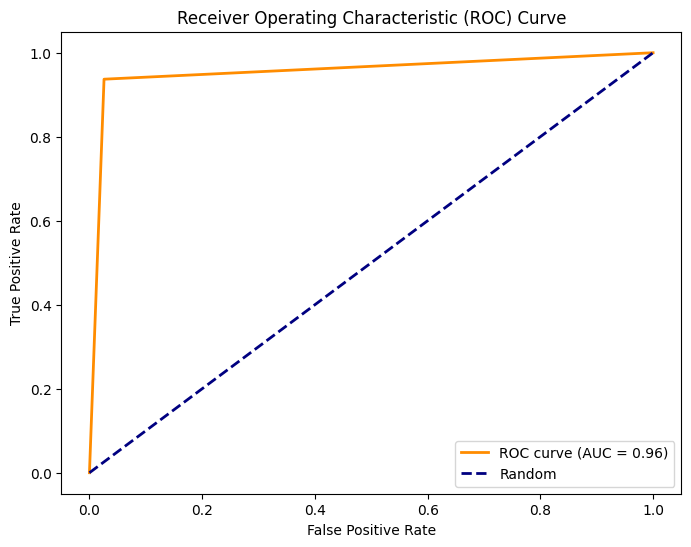

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
model = load_model('trained_gesture_model.h5')

cap = cv2.VideoCapture(0) 
cap.set(3, 640) 
cap.set(4, 480)
cap.set(10, 100)


text = ['hi', 'thumbs-up']
positions = [(50, 50), (50, 100), (50, 150)] 
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 3

image_width, image_height = 64, 64

font_color_red = (0, 0, 255) 
font_color_blue = (255, 0, 0) 


while True: 
    success, img = cap.read()

    resized_img = cv2.resize(img, (image_width, image_height)) 
    grey_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY) / 255

    pred = model.predict(np.array([grey_img] ))

    print(pred)

    num = int(np.argmax(pred))

    for i in range(NUM_CLASSES):
        if round(float(pred[:,i]), 3) > 0.5:
            cv2.putText(img, text[i]+f' {round(float(pred[:,i]), 3)}', positions[i], font, font_scale, font_color_red, thickness)
        else:
            cv2.putText(img, text[i]+f' {round(float(pred[:,i]), 3)}', positions[i], font, font_scale, font_color_blue, thickness)
    
    cv2.imshow('python', img) 
    
    if cv2.waitKey(20) == 27: 
        break

cv2.destroyWindow("python")  
cap.release()  
cv2.waitKey(1)


1/1 [==============================] - 0s 149ms/step
[[0.1789168 0.8210832]]
1/1 [==============================] - 0s 27ms/step
[[0.18823005 0.8117699 ]]
1/1 [==============================] - 0s 24ms/step
[[0.20680428 0.7931957 ]]
1/1 [==============================] - 0s 28ms/step
[[0.21415877 0.78584117]]
1/1 [==============================] - 0s 24ms/step
[[0.15920319 0.8407968 ]]
1/1 [==============================] - 0s 24ms/step
[[0.16531907 0.834681  ]]
1/1 [==============================] - 0s 24ms/step
[[0.16413644 0.8358636 ]]
1/1 [==============================] - 0s 28ms/step
[[0.17254528 0.8274547 ]]
1/1 [==============================] - 0s 26ms/step
[[0.16177289 0.8382271 ]]
1/1 [==============================] - 0s 29ms/step
[[0.1430888 0.8569112]]
1/1 [==============================] - 0s 28ms/step
[[0.12192605 0.878074  ]]
1/1 [==============================] - 0s 26ms/step
[[0.13840519 0.86159486]]
1/1 [==============================] - 0s 25ms/step
[[0.13105085 0.

-1